***

# **STA 160 Project Code**

***

In [23]:
# Packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro 
from scipy.stats import norm
from zepid import RiskRatio
from dash import Dash, html, Input, Output, dash_table
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import sklearn as sk
import sklearn.linear_model
import random
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor 
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from gower import gower_matrix

In [3]:
# Loading

heart = pd.read_csv("/Users/fish/Documents/STA 160/heart disease.csv")

In [3]:
heart.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [16]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [70]:
heart.Income.value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

In [17]:
heart.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [18]:
# Ratio 

print("The ratio between those without heart disease compared to those with heart disease is: ", 229787/23893, ':', 1)

The ratio between those without heart disease compared to those with heart disease is:  9.617335621311682 : 1


***

# **Machine Learning With Character Traits**

***

In [149]:
heart.Age.value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

In [24]:
# Writing a function so we just have to create the subset

def pred_scores(df):
    num = (df["HeartDiseaseorAttack"] == 1).sum()
    denom = (df["HeartDiseaseorAttack"] == 0).sum()

    ratio = num / denom
    print(f"The ratio of those with HD vs those without HD = {num}:{denom}")

    # Tree

    # Subset Data
    X = df.iloc[:, 1:len(df.columns)]
    y = df['HeartDiseaseorAttack']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Fit the model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"The Decision Tree Precision Rating is: {accuracy:}")

    # KNN Precision Score
    
    distance_matrix = gower_matrix(X_train)

    # Used 7 neighbors before
    knn = KNeighborsClassifier(n_neighbors=5, metric = 'precomputed')
  
    knn.fit(distance_matrix, y_train)

    # Calculate the Gower distance matrix for the test set
    test_distance_matrix = gower_matrix(X_test, X_train)

    # Predict the target variable for the test set
    y_pred = knn.predict(test_distance_matrix)

    # Print the accuracy score of the KNN classifier
    accuracy = knn.score(test_distance_matrix, y_test)

    print("The KNN Clustering Precision Score is", accuracy)

    # Logistic Regression Score

    logisticRegr = LogisticRegression()

    logisticRegr.fit(X_train, y_train)

    score = logisticRegr.score(X_test, y_test)

    print("The Logistic Regression Precision Score is", score)

    # LASSO SCORE
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
 
    # Fit Lasso regression model
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
 
    # Evaluate model performance on test set
    y_pred = lasso.predict(X_test)
 
    # Model Score
    print("Model Score: ", lasso.score(X_test, y_test))
    
    # Lasso Coef
    print("Lasso Coefficient: ", lasso.coef_)



In [27]:
# Young Male High Income on Heart Disease

ymhi = heart[(heart["Sex"] == 0) & (heart["Income"] > 5) & (heart["Age"] <= 5)] 
ymhi = ymhi[["HeartDiseaseorAttack", "Sex", "Income", "Age"]]

pred_scores(ymhi)

# Can include feature importance if we want but i think it's fine

The ratio of those with HD vs those without HD = 138:20140
The Decision Tree Precision Rating is: 0.993836291913215


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

The KNN Clustering Precision is 0.993836291913215
The Logistic Regression Precision Score is 0.993836291913215
Model Score:  -0.00010503747099477323
Lasso Coefficient:  [ 0. -0.  0.]


In [28]:
# Young Female High Income on Heart Disease

yfhi = heart[(heart["Sex"] == 1) & (heart["Income"] > 5) & (heart["Age"] <= 5)] 
yfhi = yfhi[["HeartDiseaseorAttack", "Sex", "Income", "Age"]]

pred_scores(yfhi)

The ratio of those with HD vs those without HD = 186:18579
The Decision Tree Precision Rating is: 0.9890754063415934


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

The KNN Clustering Precision is 0.9890754063415934
The Logistic Regression Precision Score is 0.9890754063415934
Model Score:  -0.00014825023654352343
Lasso Coefficient:  [ 0. -0.  0.]


In [226]:
# Elderly Male High Income on Heart Disease

emhi = heart[(heart["Sex"] == 0) & (heart["Income"] > 5) & (heart["Age"] > 10)] 
emhi = emhi[["HeartDiseaseorAttack", "Sex", "Income", "Age"]]

pred_scores(emhi)

The ratio of those with HD vs those without HD = 1540:13008
The Decision Tree Precision Rating is: 0.8962199312714777
The KNN Clustering Precision is 0.8962199312714777
The Logistic Regression Precision Score is 0.8962199312714777
Model Score:  -7.243459559025389e-05
Lasso Coefficient:  [ 0. -0.  0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [227]:
# Elderly Female High Income on Heart Disease

efhi = heart[(heart["Sex"] == 1) & (heart["Income"] > 5) & (heart["Age"] > 10)] 
efhi = efhi[["HeartDiseaseorAttack", "Sex", "Income", "Age"]]

pred_scores(efhi)

The ratio of those with HD vs those without HD = 3828:11873
The Decision Tree Precision Rating is: 0.7561286214581343


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



The KNN Clustering Precision is 0.7561286214581343
The Logistic Regression Precision Score is 0.7561286214581343
Model Score:  -3.6082815402238566e-08
Lasso Coefficient:  [ 0. -0.  0.]


In [29]:
# Young Male Low Income on Heart Disease

ymli = heart[(heart["Sex"] == 0) & (heart["Income"] < 4) & (heart["Age"] <= 5)] 
ymli = ymli[["HeartDiseaseorAttack", "Sex", "Income", "Age"]]

pred_scores(ymli)

The ratio of those with HD vs those without HD = 150:4297
The Decision Tree Precision Rating is: 0.9730337078651685
The KNN Clustering Precision is 0.9730337078651685
The Logistic Regression Precision Score is 0.9730337078651685
Model Score:  -0.00272561661871884
Lasso Coefficient:  [ 0. -0.  0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [229]:
# Young Female Low Income on Heart Disease

yfli = heart[(heart["Sex"] == 1) & (heart["Income"] < 4) & (heart["Age"] <= 5)] 
yfli = yfli[["HeartDiseaseorAttack", "Sex", "Income", "Age"]]

pred_scores(yfli)

The ratio of those with HD vs those without HD = 105:2362
The Decision Tree Precision Rating is: 0.9615384615384616
The KNN Clustering Precision is 0.9615384615384616
The Logistic Regression Precision Score is 0.9615384615384616
Model Score:  -0.0007107507355379461
Lasso Coefficient:  [ 0. -0.  0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [30]:
# Elderly Male Low Income on Heart Disease

emli = heart[(heart["Sex"] == 0) & (heart["Income"] < 4) & (heart["Age"] > 10)] 
emli = ymli[["HeartDiseaseorAttack", "Sex", "Income", "Age"]]

pred_scores(emli)

The ratio of those with HD vs those without HD = 150:4297
The Decision Tree Precision Rating is: 0.9730337078651685
The KNN Clustering Precision is 0.9730337078651685
The Logistic Regression Precision Score is 0.9730337078651685
Model Score:  -0.00272561661871884
Lasso Coefficient:  [ 0. -0.  0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [31]:
# Elderly Female Low Income on Heart Disease

efli = heart[(heart["Sex"] == 1) & (heart["Income"] < 4) & (heart["Age"] > 10)] 
efli = efli[["HeartDiseaseorAttack", "Sex", "Income", "Age"]]

pred_scores(efli)

The ratio of those with HD vs those without HD = 829:1896
The Decision Tree Precision Rating is: 0.689908256880734
The KNN Clustering Precision is 0.689908256880734
The Logistic Regression Precision Score is 0.689908256880734
Model Score:  -0.0002517940324813228
Lasso Coefficient:  [0. 0. 0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

From these, we see that it's mostly the variables of age and gender that impact whether somebody has heart disease or not.

***

# **Machine Learning With Health Traits**

***

As we conducted the character traits before, we want to see if looking at the data from a pure health perspective is a better alternative than looking at an individuals identity.

The data is highly inbalanced in nature. 

In [33]:
# Stroke, HighBP, HighChol, HD

(heart["CholCheck"] == 1).sum()

# Subsetting to only CholCheck == 1, as a CholCheck of zero implies a zero for HighChol when that might not be the case

health = heart[heart["CholCheck"] == 1]

***
# List of Comboes
***

~~000~~ - None for all

~~001~~ - Only high chol

~~010~~ - Only high BP

~~011~~ - HighBP, HighChol

~~100~~ - Had a Stroke

~~101~~ - Had a stroke, HighChol

~~110~~ - Had a Stroke, HighBP

~~111~~ - Had a Stroke, HighBP, HighChol

In [34]:
# None for all [000]

zero_zero_zero = health[(health["Stroke"] == 0) & (health["HighBP"] == 0) & (health["HighChol"] == 0)] 
zero_zero_zero = zero_zero_zero[["HeartDiseaseorAttack", "Stroke", "HighBP", "HighChol"]]

pred_scores(zero_zero_zero)

The ratio of those with HD vs those without HD = 2427:91568
The Decision Tree Precision Rating is: 0.9746263099101016


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

The KNN Clustering Precision is 0.9746263099101016
The Logistic Regression Precision Score is 0.9746263099101016
Model Score:  -1.2615002482174731e-05
Lasso Coefficient:  [0. 0. 0.]


In [35]:
# Only High Chol [001]

zero_zero_one = health[(health["Stroke"] == 0) & (health["HighBP"] == 0) & (health["HighChol"] == 1)] 
zero_zero_one = zero_zero_one[["HeartDiseaseorAttack", "Stroke", "HighBP", "HighChol"]]

pred_scores(zero_zero_one)

The ratio of those with HD vs those without HD = 2708:37804
The Decision Tree Precision Rating is: 0.9327409601382204


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

The KNN Clustering Precision is 0.9327409601382204
The Logistic Regression Precision Score is 0.9327409601382204
Model Score:  -4.28236523575265e-06
Lasso Coefficient:  [0. 0. 0.]


In [36]:
# Only HighBP [010]

zero_one_zero = health[(health["Stroke"] == 0) & (health["HighBP"] == 1) & (health["HighChol"] == 0)] 
zero_one_zero = zero_one_zero[["HeartDiseaseorAttack", "Stroke", "HighBP", "HighChol"]]

pred_scores(zero_one_zero)

The ratio of those with HD vs those without HD = 3501:37552
The Decision Tree Precision Rating is: 0.9157228108634758


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

The KNN Clustering Precision is 0.9157228108634758
The Logistic Regression Precision Score is 0.9157228108634758
Model Score:  -2.0360946639375044e-05
Lasso Coefficient:  [0. 0. 0.]


In [37]:
# Did not have a stroke, has HighBP, has HighChol [011]

zero_one_one = health[(health["Stroke"] == 0) & (health["HighBP"] == 1) & (health["HighChol"] == 1)] 
zero_one_one = zero_one_one[["HeartDiseaseorAttack", "Stroke", "HighBP", "HighChol"]]

pred_scores(zero_one_one)

The ratio of those with HD vs those without HD = 11100:47413
The Decision Tree Precision Rating is: 0.8102196018115013


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

The KNN Clustering Precision is 0.8102196018115013
The Logistic Regression Precision Score is 0.8102196018115013
Model Score:  -6.336291358266521e-08
Lasso Coefficient:  [0. 0. 0.]


In [43]:
# Had A Stroke [100]

one_zero_zero = health[(health["Stroke"] == 1) & (health["HighBP"] == 0) & (health["HighChol"] == 0)] 
one_zero_zero = one_zero_zero[["HeartDiseaseorAttack", "Stroke", "HighBP", "HighChol"]]

pred_scores(one_zero_zero)

The ratio of those with HD vs those without HD = 376:1033
The Decision Tree Precision Rating is: 0.7092198581560284
The KNN Clustering Precision is 0.7092198581560284
The Logistic Regression Precision Score is 0.7092198581560284
Model Score:  -0.004338143759509361
Lasso Coefficient:  [0. 0. 0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [42]:
# Had a Stroke, does not have HighBP, Has HighChol [101]

one_zero_one = health[(health["Stroke"] == 1) & (health["HighBP"] == 0) & (health["HighChol"] == 1)] 
one_zero_one = one_zero_one[["HeartDiseaseorAttack", "Stroke", "HighBP", "HighChol"]]

pred_scores(one_zero_one)

The ratio of those with HD vs those without HD = 345:838
The Decision Tree Precision Rating is: 0.7088607594936709
The KNN Clustering Precision is 0.2911392405063291
The Logistic Regression Precision Score is 0.7088607594936709
Model Score:  -1.8357668682966732e-06
Lasso Coefficient:  [0. 0. 0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [40]:
# Had a Stroke, Has HighBP, Does not have HighChol [110]

one_one_zero = health[(health["Stroke"] == 1) & (health["HighBP"] == 1) & (health["HighChol"] == 0)]
one_one_zero = one_one_zero[["HeartDiseaseorAttack", "Stroke", "HighBP", "HighChol"]]

pred_scores(one_one_zero)

The ratio of those with HD vs those without HD = 709:1434
The Decision Tree Precision Rating is: 0.682983682983683
The KNN Clustering Precision is 0.682983682983683
The Logistic Regression Precision Score is 0.682983682983683
Model Score:  -0.0013806001940108725
Lasso Coefficient:  [0. 0. 0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [41]:
# Has All

one_one_one = health[(health["Stroke"] == 1) & (health["HighBP"] == 1) & (health["HighChol"] == 1)] 
one_one_one = one_one_one[["HeartDiseaseorAttack", "Stroke", "HighBP", "HighChol"]]

pred_scores(one_one_one)

The ratio of those with HD vs those without HD = 2456:2946
The Decision Tree Precision Rating is: 0.5513413506012951
The KNN Clustering Precision is 0.4486586493987049
The Logistic Regression Precision Score is 0.5513413506012951
Model Score:  -0.0002265350338084282
Lasso Coefficient:  [0. 0. 0.]


/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

***

# **Descriptive Statistics**

***

In [312]:
heart.groupby(['Sex', 'Income'])[['HeartDiseaseorAttack']].aggregate(['mean','count'])

HeartDiseaseorAttack       
                           mean  count
Sex Income                            
0.0 1.0                0.151187   6654
    2.0                0.167881   7958
    3.0                0.137514  10508
    4.0                0.113989  12817
    5.0                0.091285  15720
    6.0                0.065649  20503
    7.0                0.045076  23161
    8.0                0.025351  44653
1.0 1.0                0.173266   3157
    2.0                0.225098   3825
    3.0                0.195771   5486
    4.0                0.186800   7318
    5.0                0.169832  10163
    6.0                0.144047  15967
    7.0                0.117659  20058
    8.0                0.075505  45732

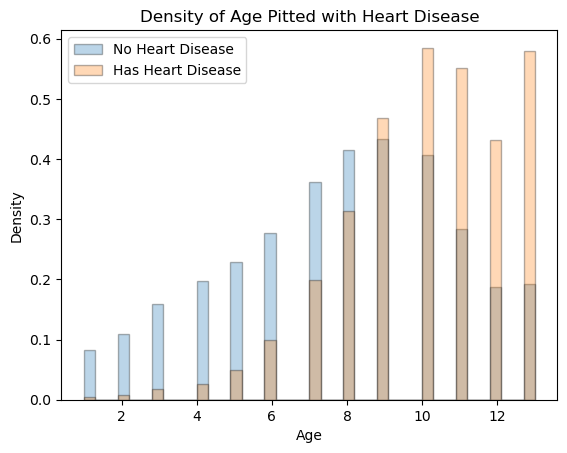

In [326]:
# Age and Heart Disease Density Plot

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, edgecolor = 'k')

plt.hist(heart.Age[heart.HeartDiseaseorAttack==0], **kwargs, label='No Heart Disease')
plt.hist(heart.Age[heart.HeartDiseaseorAttack==1], **kwargs, label='Has Heart Disease')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density of Age Pitted with Heart Disease")
plt.legend(loc ="upper left")

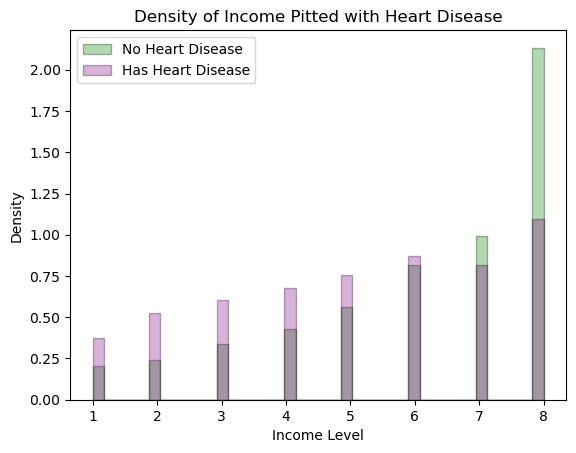

In [12]:
# Income and Heart Disease Density Plot

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, edgecolor = 'k')

plt.hist(heart.Income[heart.HeartDiseaseorAttack==0], **dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, edgecolor = 'k', color = 'green'), label='No Heart Disease')
plt.hist(heart.Income[heart.HeartDiseaseorAttack==1], **dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, edgecolor = 'k', color = 'purple'), label='Has Heart Disease')
plt.xlabel("Income Level")
plt.ylabel("Density")
plt.title("Density of Income Pitted with Heart Disease")
plt.legend(loc ="upper left")

In [341]:
one_one_one

,HeartDiseaseorAttack,Stroke,HighBP,HighChol
20,1.0,1.0,1.0,1.0
26,1.0,1.0,1.0,1.0
30,0.0,1.0,1.0,1.0
65,1.0,1.0,1.0,1.0
69,1.0,1.0,1.0,1.0
...,...,...,...,...
253174,0.0,1.0,1.0,1.0
253332,0.0,1.0,1.0,1.0
253464,1.0,1.0,1.0,1.0
253581,1.0,1.0,1.0,1.0


In [348]:
data = one_one_one.to_numpy()
data

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [0., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [349]:
#create 2x2 table
data = one_one_one.to_numpy()

#Chi-squared test statistic, sample size, and minimum of rows and columns
X2 = stats.chi2_contingency(data, correction=False)[0]
n = np.sum(data)
minDim = min(data.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)


0.2131809819439094


In [340]:
#create 2x2 table
#data = np.array([[7,12], [9,8]])

#Chi-squared test statistic, sample size, and minimum of rows and columns
X2 = stats.chi2_contingency(one_one_one, correction=False)[0]
n = np.sum(one_one_one)
minDim = min(one_one_one.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)

HeartDiseaseorAttack    0.587643
Stroke                  0.396233
HighBP                  0.396233
HighChol                0.396233
dtype: float64


In [329]:
# Formatting Contingency Table Nicely
cont_table = pd.crosstab(index=[health['Stroke'], health['HighBP'],health['HighChol']], columns=health['HeartDiseaseorAttack'], margins=True)# contingency table of fused y predictor variable ()

cont_table['Column Sum']  = cont_table.sum(axis = 1)
cont_table.loc['Row Sum'] = cont_table.sum()
odds_ratio = (cont_table.iloc[0,0] * cont_table.iloc[1,1]) / (cont_table.iloc[0,1] * cont_table.iloc[1,0]) # odds ratio of contingency table

odds_ratio2 = (cont_table.iloc[4,0])

values = ['(0,0,0)', '(0,0,1)', '(0,1,0)', '(0,1,1)', '(1,0,0)', '(1,0,1)', '(1,1,0)', '(1,1,1)', '(All)', 'Col Sum']

col1_list = cont_table.iloc[:, 0].tolist()
col2_list = cont_table.iloc[:, 1].tolist()
col3_list = cont_table['All'].tolist()

plot_frame = pd.DataFrame({'HeartDiseaseorAttack': values, '0 (No Heart Disease)': col1_list, '1 (Has Heart Disease)': col2_list, 'Row Sum': col3_list})

# Adm Frame in pretty format
fig = go.Figure(data=[go.Table(
    header=dict(values=list(plot_frame.columns),
                fill_color='lavender',
                align='center'),
    cells=dict(values=[plot_frame['HeartDiseaseorAttack'], plot_frame['0 (No Heart Disease)'].apply(lambda x : "{:,}".format(x)), plot_frame['1 (Has Heart Disease)'].apply(lambda x : "{:,}".format(x)), plot_frame['Row Sum'].apply(lambda x : "{:,}".format(x))],
               fill_color='ivory',
               align='center'))
])
fig.update_layout(
    title_text = "Contingency Table of Stroke/HighBP/HighChol on Heart Disease",
    title_font_size=30,
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black",
)
fig.update_traces(cells_font=dict(size = 12))
fig.show()

<AxesSubplot:xlabel='Age', ylabel='HeartDiseaseorAttack'>

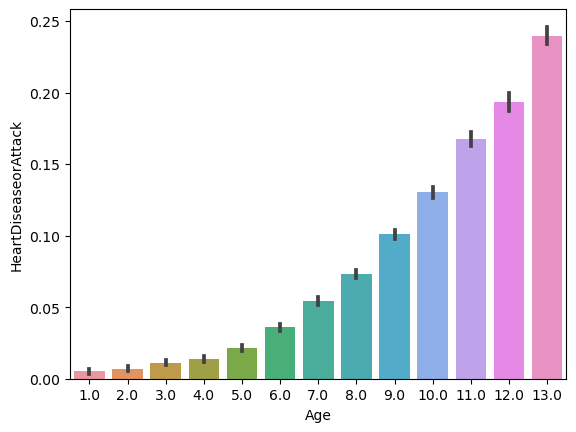

In [339]:
# Plots for hierarchical clustering

sns.barplot(x=heart['Age'],
                y=heart['HeartDiseaseorAttack'])

(array([13298., 11123., 13823., 16157., 19819., 57146., 33244., 32194.,
        23533., 33343.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

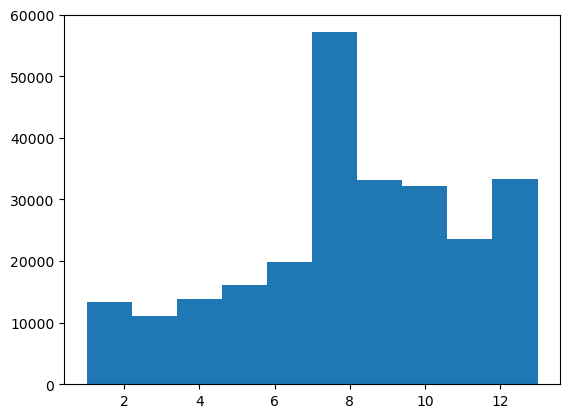

In [8]:
plt.hist(heart.Age)

In [127]:
heart.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


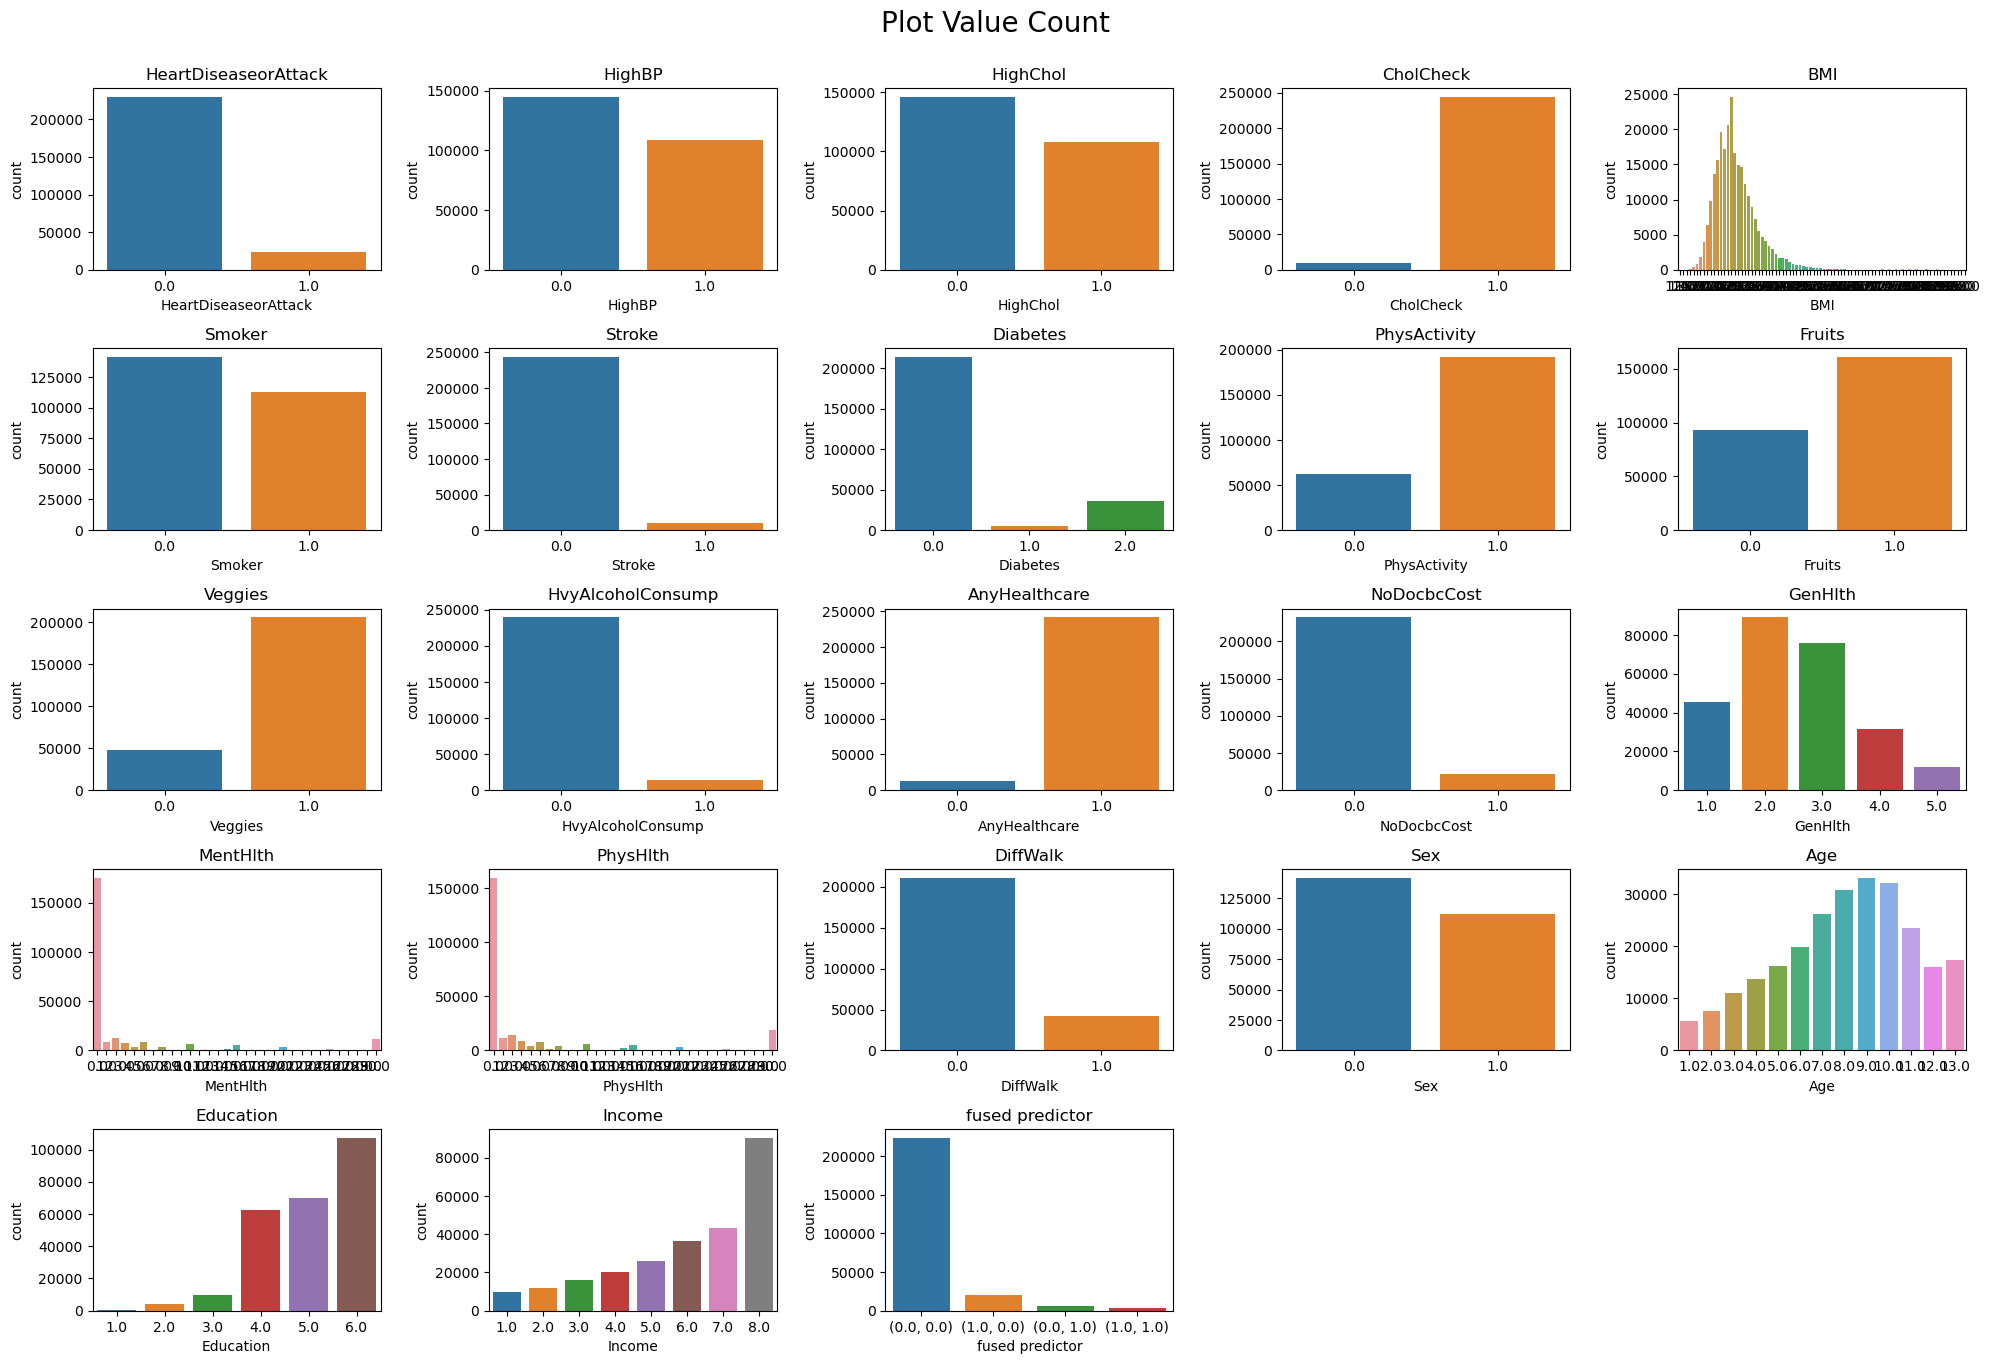

In [128]:
plt.figure(figsize=(20,60))
for i,column in enumerate(heart.columns):
    plt.subplot(len(heart.columns), 5, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=heart, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [44]:
heart.NoDocbcCost.value_counts()

0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64

In [50]:
heart.Income[heart.NoDocbcCost == 1].value_counts()

6.0    3018
4.0    2982
5.0    2922
3.0    2788
8.0    2723
7.0    2619
2.0    2205
1.0    2097
Name: Income, dtype: int64

In [51]:
heart.Age[heart.NoDocbcCost == 1].value_counts()

8.0     3185
7.0     3098
9.0     2813
6.0     2264
5.0     1856
4.0     1653
10.0    1524
3.0     1429
2.0     1038
11.0     811
1.0      674
12.0     523
13.0     486
Name: Age, dtype: int64

In [53]:
heart.Income.value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64